In [1]:
import numpy as np
import openturns as ot
from depimpact import ConservativeEstimate, quantile_func
from depimpact.tests import func_sum
from depimpact.plots import set_style_paper, matrix_plot_quantities
import matplotlib.pyplot as plt

set_style_paper()

%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\naz-probook\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [43]:
dim = 2
grid_type = 'lhs'
dep_measure = 'kendall'
K = 10
n = 10000
alpha = 0.01

margins = [ot.Normal()]*dim
q_func = quantile_func(alpha)

In [68]:
cop_ids = [2]
grid_results = {}
for cop_id in cop_ids:
    families = np.tril(np.ones((dim, dim), dtype=int)*cop_id, k=-1)
    quant_estimate = ConservativeEstimate(model_func=func_sum, margins=margins, families=families)
    grid_result = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, dep_measure=dep_measure)
    grid_result.q_func = q_func
    min_result = grid_result.min_result
    print('Minimum quantile: {} at param: {}'.format(min_result.quantity, min_result.kendall_tau))
    grid_results[cop_id] = grid_result

RRuntimeError: Error: 
 In function (Matrix, family = array(0, dim = dim(Matrix)), par = array(NA, dim = dim(Matrix)), par2 = array(NA, dim = dim(Matrix)), names = NULL, check.pars = TRUE) 
{
    args <- preproc(c(as.list(environment()), call = match.call()), check_matrix, check_fammat, check_parmat, check_par2mat)
    list2env(args, environment())
    if (length(names) > 0 & length(names) != dim(Matrix)[1]) 
        stop("Length of the vector 'names' is not correct.")
    sel <- lower.tri(family)
    if (check.pars & (any(family != 0) | any(!is.na(par)))) {
        BiCopCheck(family[sel], par[sel], par2[sel], call = match.call())
    }
    MaxMat <- createMaxMat(Matrix)
    CondDistr <- neededCondDistr(Matrix)
    RVM <- list(Matrix = Matrix, family = family, par = par, par2 = par2, names = names, MaxMat = MaxMat, CondDistr = CondDistr)
    class(RVM) <- "RVineMatrix"
    if (is.CVine(RVM)) {
        RVM$type <- "C-vine"
    }
    else if (is.DVine(RVM)) {
        RVM$type <- "D-vine"
    }
    els


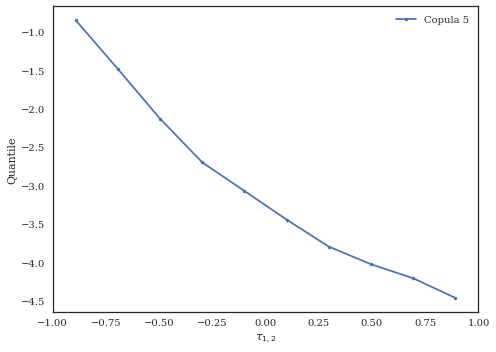

In [67]:
from depimpact.plots import plot_quantities
    
labels = ['Copula %d' % (cop_id) for cop_id in cop_ids]
results = list(grid_results.values())
fig, axes = plot_quantities(results, quantity_name='Quantile', label=labels, plot_scatter=False, n_bins=12)
fig.tight_layout()

In [55]:
np.isin(families, [1, 6])

array([[False, False],
       [ True, False]])